In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

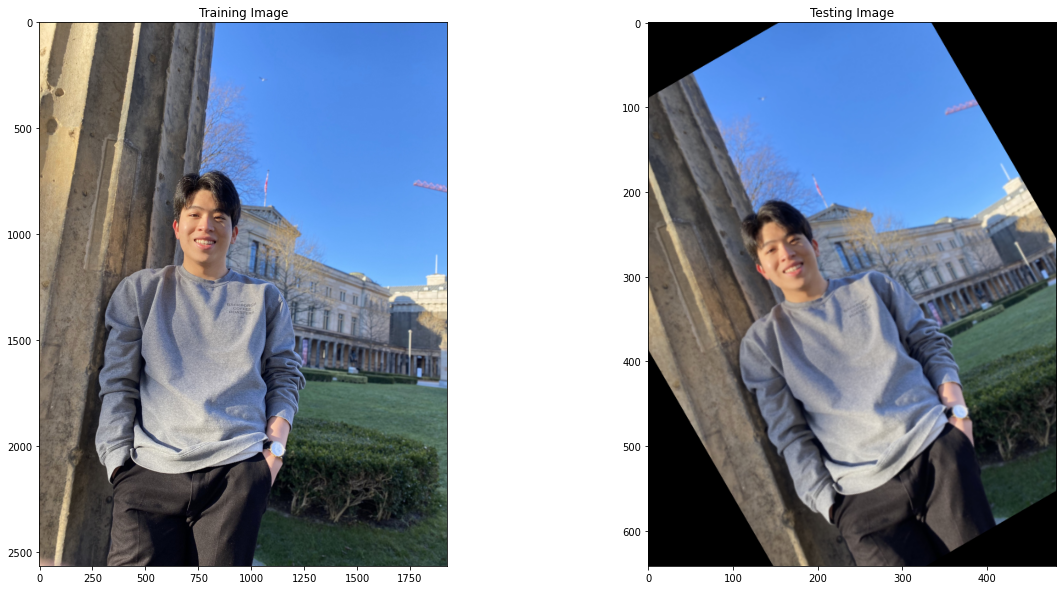

In [3]:
image = cv2.imread('Photos/vuinberlin.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# create images by adding Scale Invariance and Rotational Invariance
# cv2.pyrDown => blur image and downsample it
test_image = cv2.pyrDown(rgb_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(rgb_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  9200
Number of Keypoints Detected In The Query Image:  1058


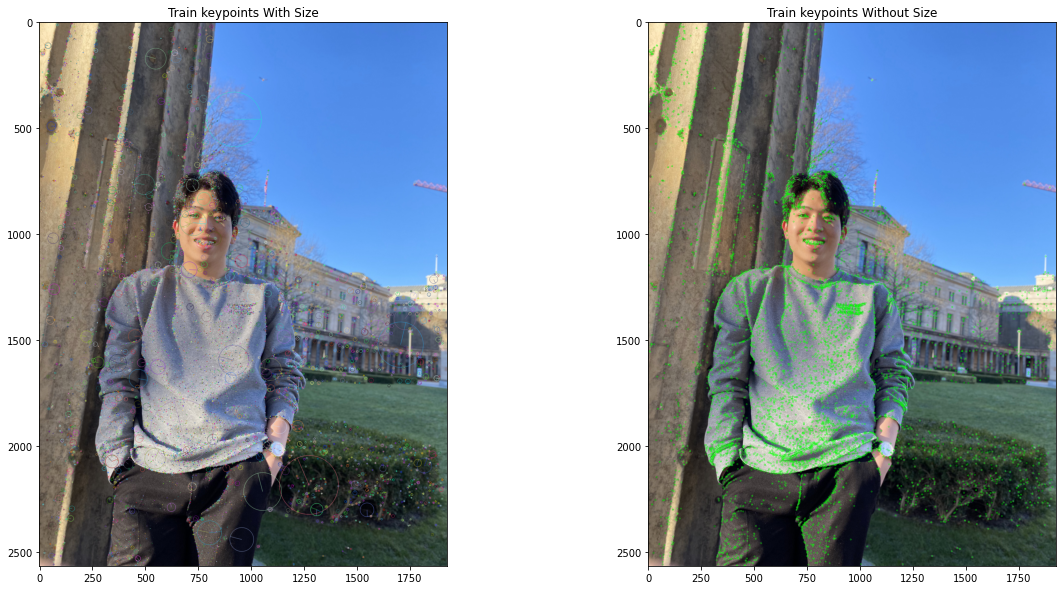

In [10]:
# Detec Keypoints and Create Descriptor
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(rgb_image)
keypoints_with_size = np.copy(rgb_image)

cv2.drawKeypoints(rgb_image, train_keypoints,
                  keypoints_without_size, color=(0, 255, 0))
cv2.drawKeypoints(rgb_image, train_keypoints, keypoints_with_size,
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20, 10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))


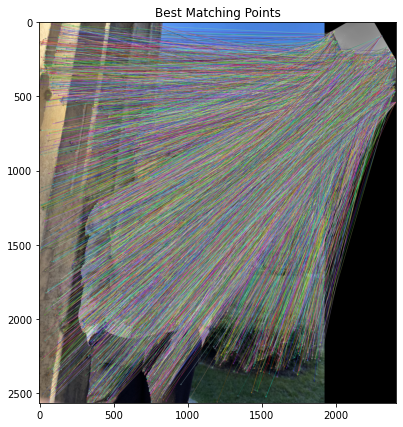


Number of Matching Keypoints Between The Training and Query Images:  9200


In [7]:
# Matching Keypoints

# Create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

# Perform the matching between the SIFT descriptors of the original image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we need
matches = sorted(matches, key=lambda x : x.distance)

result = cv2.drawMatches(rgb_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags=2)

plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))